In [1]:
import numpy as np
import pandas as pd
import tabulate
import matplotlib.pyplot as plt
from matplotlib import animation
import pickle, random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# **Loading data**"

In [2]:
with open('/kaggle/input/aaaaaaaa/train_dataset.pickle', 'rb') as f:
    data = pickle.Unpickler(f).load()

with open('/kaggle/input/aaaaaaaa/test_dataset.pickle', 'rb') as g:
    test = pickle.Unpickler(g).load()

# **Sampling Data**

### **Training Data**

In [3]:
xi_train, yi_train = np.split(data, 2, axis=1)
xi_train = np.array_split(xi_train, 20)
yi_train = np.array_split(yi_train, 20)

### **Testing Data**

In [4]:
xi_test, yi_test = test[:,0], test[:,1]
xi_test = xi_test.reshape(-1, 1)

# **Polynomial Regression**

### **Training and Testing Data**

In [5]:
xi_vec_train = { "degree " + str(i): [PolynomialFeatures(i).fit_transform(x.reshape(-1, 1)) for x in np.array_split(np.concatenate(xi_train), 20)] for i in range(1, 16) }
xi_vec_test = { "degree " + str(i): PolynomialFeatures(i).fit_transform(np.concatenate(xi_test).reshape(-1, 1)) for i in range(1, 16) }

# **Training the Model**

In [6]:
Models = { "degree " + str(i): [LinearRegression().fit(xi_vec_train["degree " + str(i)][j], yi_train[j]) for j in range(20)] for i in range(1, 16) }


# **Prediction**

In [7]:
f_cap_x = { "degree " + str(i): np.array([Models["degree " + str(i)][j].predict(xi_vec_test["degree " + str(i)]) for j in range(20)]) for i in range(1, 16) }

# **Variance**

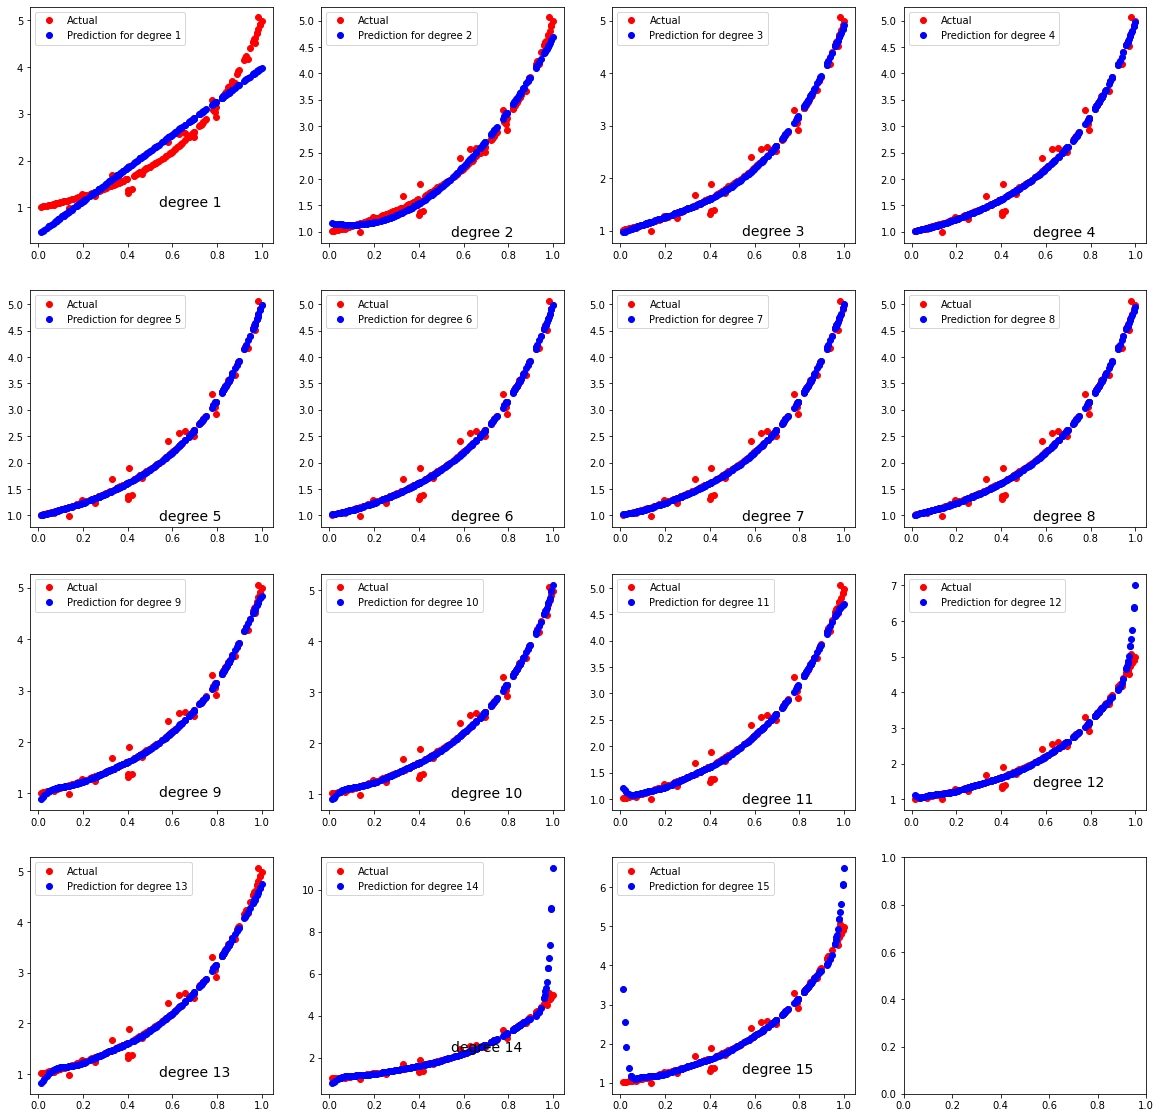

In [8]:
variance = np.zeros(20)
avg_f_cap_x = {}

for idx, degree in enumerate(f_cap_x):
    data = np.array(f_cap_x[degree])
    variance[idx] = np.mean(np.var(data, axis=0))
    avg_f_cap_x[degree] = np.mean(data, axis=0)

fig, axs = plt.subplots(4, 4, figsize=(20,20))
axs = axs.flatten()

for i, degree in enumerate(avg_f_cap_x):
    axs[i].plot(xi_test, yi_test, "o", color="red", label="Actual")
    axs[i].plot(xi_test, avg_f_cap_x[degree], "o", color="blue", label="Prediction for " + degree)
    
    axs[i].legend()

    axs[i].text((axs[i].get_xlim()[1] - axs[i].get_xlim()[0]) / 2, 
            (axs[i].get_ylim()[1] - axs[i].get_ylim()[0]) / 4, 
            degree, 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=14)

plt.show()

## **Bias**

[1.20798073 1.19080905 1.18750632 1.18920491 1.1892516  1.18934158
 1.19054864 1.18853122 1.1858014  1.19111083 1.17672826 1.23037817
 1.17720373 1.31202757 1.21203354 0.         0.         0.
 0.         0.        ]


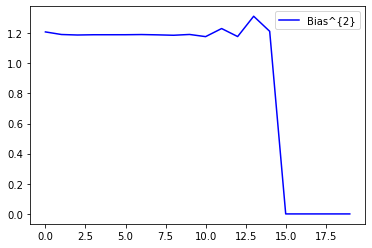

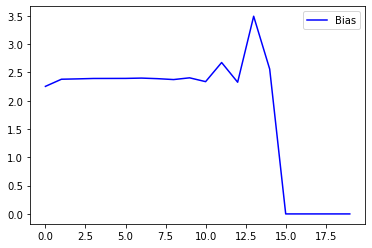

In [9]:
Bias_2 = np.zeros(20)
Bias = np.zeros(20)

for idx, degree in enumerate(f_cap_x):
    data = np.array(f_cap_x[degree])
    Bias[idx] = np.mean(abs(np.mean(data, axis = 0) - yi_test))
    Bias_2[idx] = np.mean((np.mean(data, axis = 0) - yi_test) ** 2)
    
print(Bias)
plt.plot(Bias,color="blue",label="Bias^{2}")
plt.legend()
plt.show()


plt.plot(Bias_2,color="blue",label="Bias")
plt.legend()
plt.show()


## **Irreducible Error**

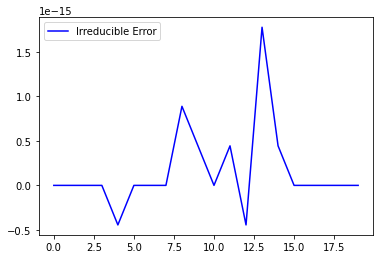

In [10]:
mse = np.zeros(20)
for idx, degree in enumerate(f_cap_x):
    data = np.array(f_cap_x[degree])
    for i in data:
        mse[idx] += np.mean(np.square(i - yi_test))
mse /= 20

ierr = mse -  variance - Bias_2


plt.plot(ierr,color="blue",label="Irreducible Error")
plt.legend()
plt.show()

## **